Customer Lifetime Value (CLV) Prediction in Auto Insurance companies

Predicting Customer Lifetime Value and understanding customer behavior in an auto insurance context.

This project focuses on building a regression model to predict the Customer Lifetime Value (CLV) of auto insurance customers using features such as employment status, monthly premium, number of policies, and total claim amount. This insight enables insurance companies to make smarter decisions regarding customer retention, pricing, and resource allocation.


Customer Lifetime Value (CLV) is a prediction of the total value a business can expect from a customer over the entire duration of their relationship. In the insurance industry, CLV represents the expected net profit from a policyholder, taking into account factors such as premiums paid, claims filed, policy renewals, and customer behavior.

CLV helps insurance companies:

Identify high-value customers

Optimize marketing and retention strategies

Allocate resources efficiently

Develop personalized pricing and offers

In [3]:
# import libearies
import pandas as pd 

In [4]:
# Read the csv file 
#Load dataset from CSV, Excel, or database.
df=pd.read_csv(r"clv.csv")

STEP-1 UNDERSTANDING DATA

Exploratory Data Analysis (EDA)

In [5]:
# show them into data frame
df

,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Size
0,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,384.811147,Medsize
1,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,1131.464935,Medsize
2,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,566.472247,Medsize
3,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,529.881344,Medsize
4,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,138.130879,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9079,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,73,18,89,0,2,198.234764,Medsize
9080,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,379.200000,Medsize
9081,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,790.784983,Medsize
9082,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,691.200000,Large


In [6]:
# find the shape 
df.shape

(9084, 16)

In [7]:
# find the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9084 entries, 0 to 9083
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9084 non-null   float64
 1   Response                       9084 non-null   object 
 2   Coverage                       9084 non-null   object 
 3   Education                      9084 non-null   object 
 4   EmploymentStatus               9084 non-null   object 
 5   Gender                         9084 non-null   object 
 6   Income                         9084 non-null   int64  
 7   Location Code                  9084 non-null   object 
 8   Marital Status                 9084 non-null   object 
 9   Monthly Premium Auto           9084 non-null   int64  
 10  Months Since Last Claim        9084 non-null   int64  
 11  Months Since Policy Inception  9084 non-null   int64  
 12  Number of Open Complaints      9084 non-null   i

In [8]:
# check the columns 
df.columns

Index(['Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'Vehicle Size'],
      dtype='object')

In [9]:
# Statistics

df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000
mean,8000.064839,37670.477653,93.210920,15.096543,48.044033,0.383311,2.968296,434.217194
std,6868.143013,30383.716167,34.397124,10.068631,27.914400,0.908527,2.392115,290.578027
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3996.418672,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.340392
50%,5780.182197,33899.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8941.856808,62344.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.692983
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Summary Statistics:

The dataset reveals a diverse customer portfolio with significant variation in Customer Lifetime Value (CLV), income, and total claim amounts. On average, customers have been associated with the company for nearly four years and typically hold around three policies, indicating strong retention and successful cross-selling. Most customers have no open complaints and have not filed a claim in over a year, suggesting overall satisfaction and low risk. However, the wide range in income and claim behavior highlights the need for customer segmentation — particularly to distinguish high-value, low-risk customers from low-value or high-claim segments. These insights can be effectively utilized to optimize marketing strategies, improve risk assessment models, and personalize retention offers.

In [10]:
# drop the un wanted columns
df.drop(["Response", "Education", "Gender", "Location Code", "Vehicle Size", "Marital Status"], axis=1, inplace=True)


In [11]:
df.columns

Index(['Customer Lifetime Value', 'Coverage', 'EmploymentStatus', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

STEP2: Data Cleaning & Preprocessing

Handle missing values

Remove or cap outliers

Encode categorical variables

In [12]:
# Check the null values 
df.isna().sum()


Customer Lifetime Value          0
Coverage                         0
EmploymentStatus                 0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [13]:
# check the duplicated values
df.duplicated().sum()


1084

In [14]:
# Remove the duplicated values 

df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
df

,Customer Lifetime Value,Coverage,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,Basic,Employed,56274,69,32,5,0,1,384.811147
1,6979.535903,Extended,Unemployed,0,94,13,42,0,8,1131.464935
2,12887.431650,Premium,Employed,48767,108,18,38,0,2,566.472247
3,7645.861827,Basic,Unemployed,0,106,18,65,0,7,529.881344
4,2813.692575,Basic,Employed,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...
9078,4100.398533,Premium,Employed,47761,104,16,58,0,1,541.282007
9079,23405.987980,Basic,Employed,71941,73,18,89,0,2,198.234764
9081,8163.890428,Extended,Unemployed,0,85,9,37,3,2,790.784983
9082,7524.442436,Extended,Employed,21941,96,34,3,0,3,691.200000


In [18]:
df["EmploymentStatus"].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [19]:
df["Coverage"].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [21]:
# we want to enocoding the categorical values into numerical

oe=OrdinalEncoder()
le1=LabelEncoder()

In [22]:
df["Coverage"]=oe.fit_transform(df[["Coverage"]])
df["EmploymentStatus"]=le1.fit_transform(df["EmploymentStatus"])

In [23]:
df.shape

(8000, 10)

In [24]:
df

,Customer Lifetime Value,Coverage,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,0.0,1,56274,69,32,5,0,1,384.811147
1,6979.535903,1.0,4,0,94,13,42,0,8,1131.464935
2,12887.431650,2.0,1,48767,108,18,38,0,2,566.472247
3,7645.861827,0.0,4,0,106,18,65,0,7,529.881344
4,2813.692575,0.0,1,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...
9078,4100.398533,2.0,1,47761,104,16,58,0,1,541.282007
9079,23405.987980,0.0,1,71941,73,18,89,0,2,198.234764
9081,8163.890428,1.0,4,0,85,9,37,3,2,790.784983
9082,7524.442436,1.0,1,21941,96,34,3,0,3,691.200000


STEP3:DATA VISUALIZATION

<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

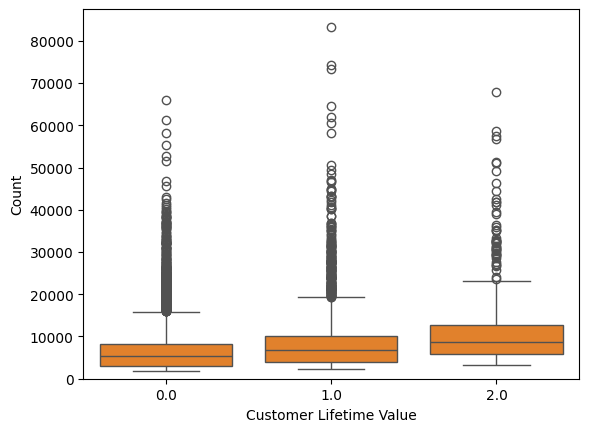

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Customer Lifetime Value'], kde=True)
sns.boxplot(x='Coverage', y='Customer Lifetime Value', data=df)


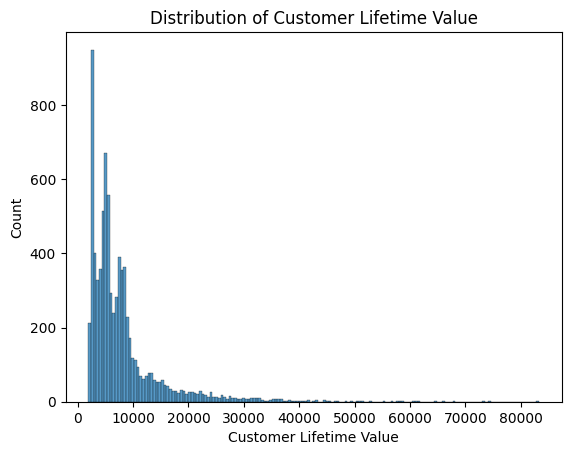

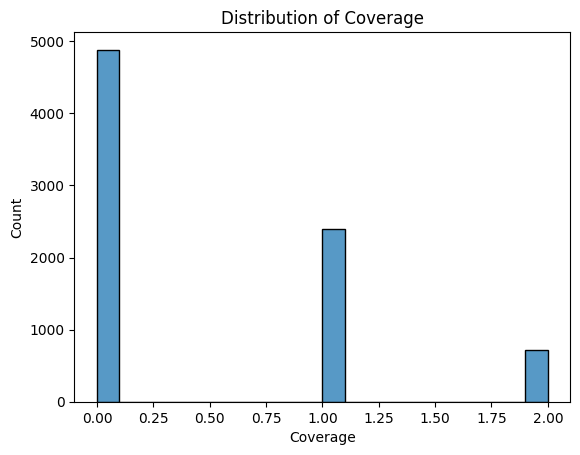

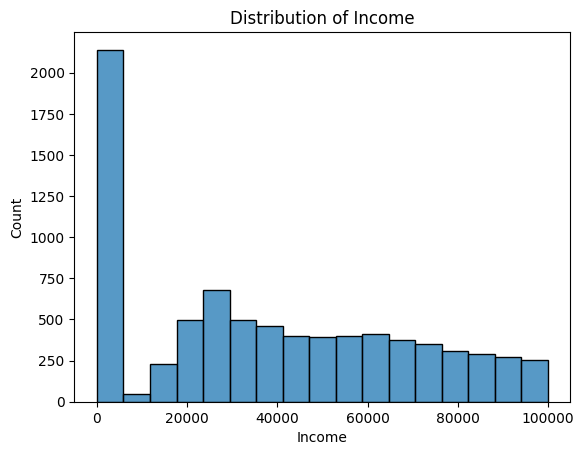

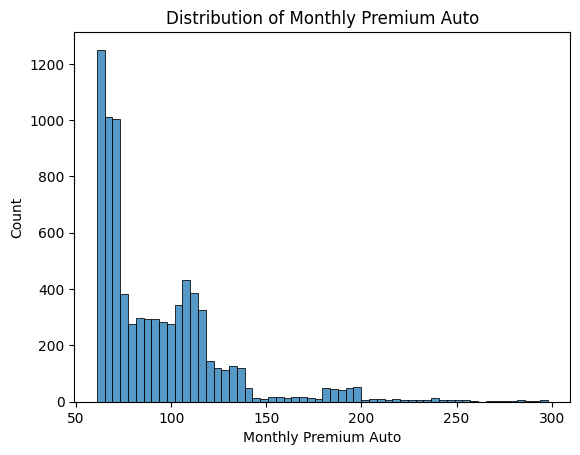

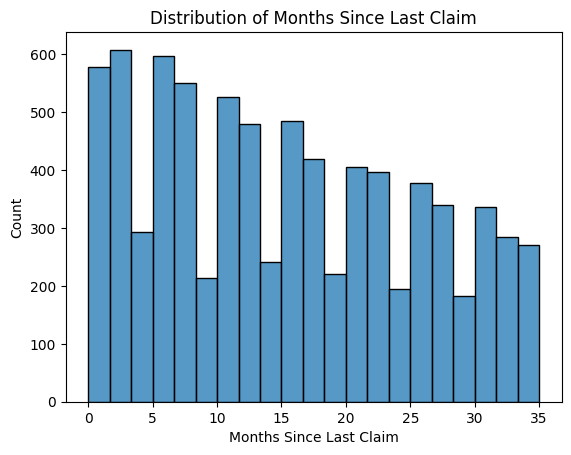

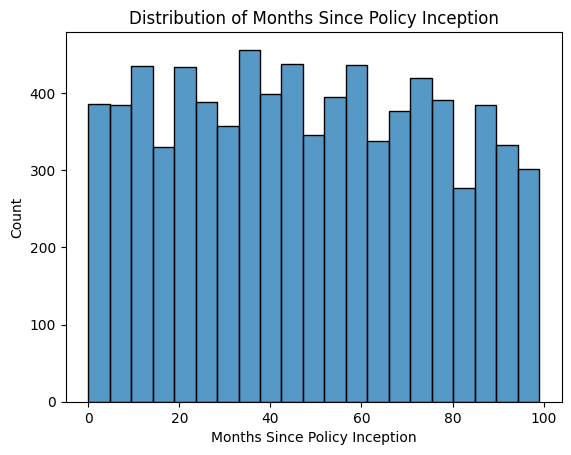

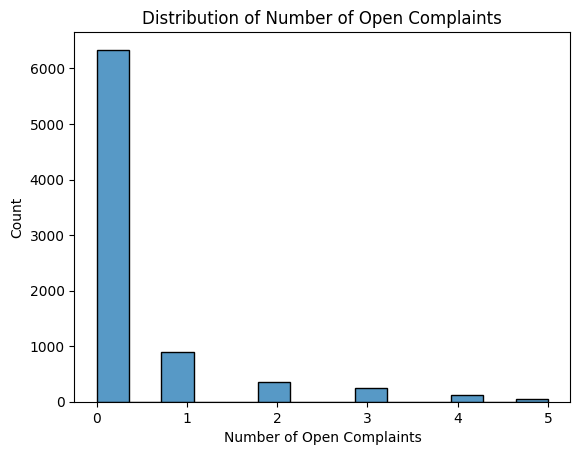

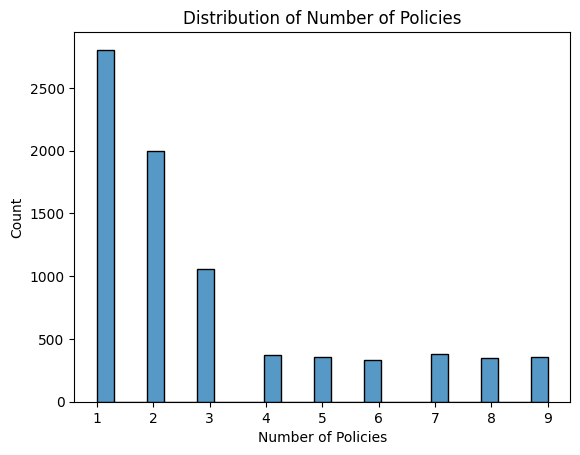

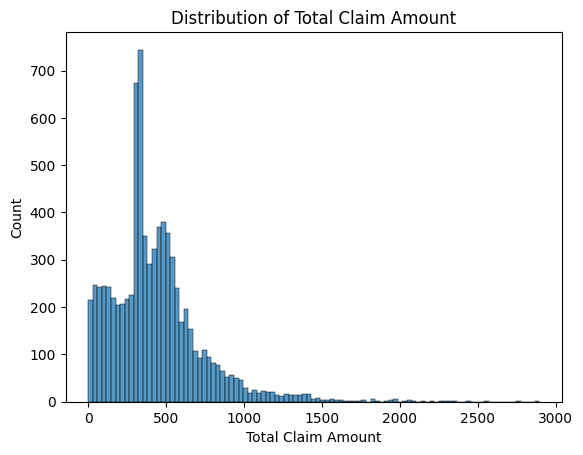

In [26]:
import seaborn as sns 
num_col=df.select_dtypes(include=['int64','float64'])
for col in num_col:
  sns.histplot(df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

Step 4 : Outlayers detected and remove 

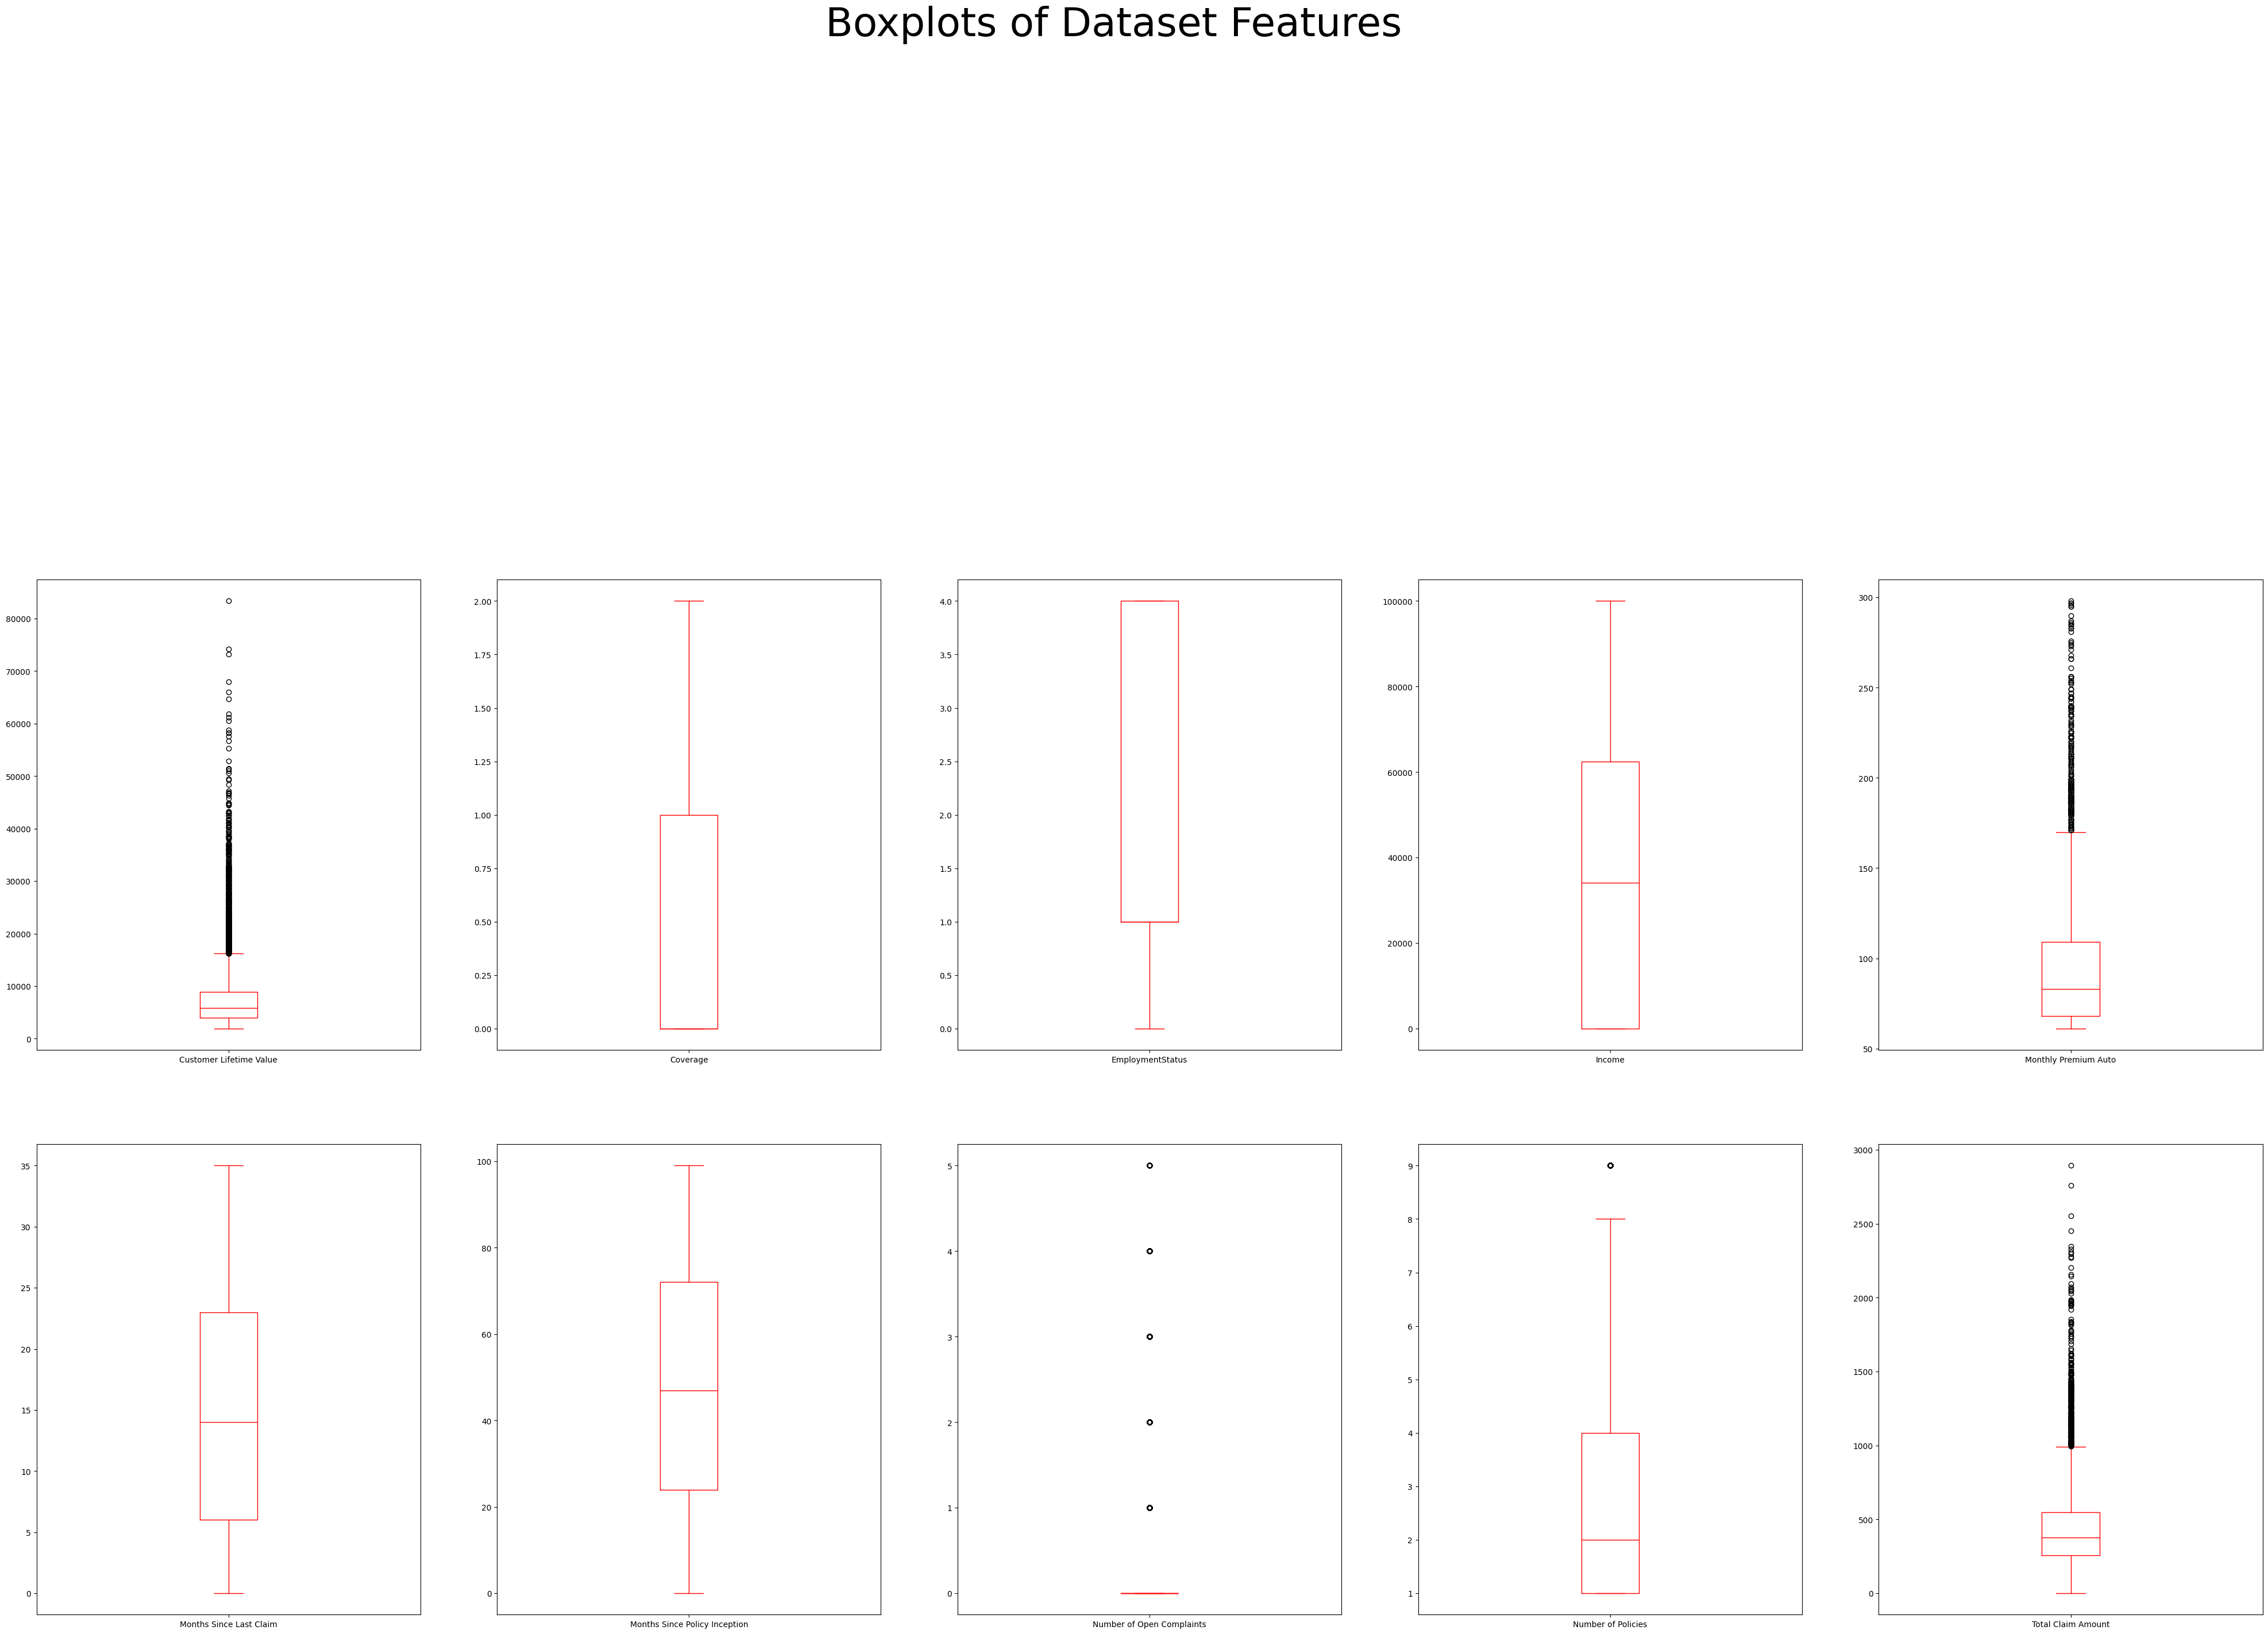

In [27]:
# outlayers detected using boxplots to visualize

import matplotlib.pyplot as plt
import seaborn as sns

df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(50, 100), color='red')
plt.suptitle('Boxplots of Dataset Features', fontsize=50)
plt.show()

In [28]:
original_shape=df.shape

# your outlier removal loop here
col=df[['Customer Lifetime Value',
    'Monthly Premium Auto',
    'Number of Policies',
    'Number of Open Complaints']]
for i in col:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df=df[(df[i]>=lower)&(df[i]<=upper)]

# shape after cleaning
new_shape=df.shape

# Print result
print(f'Original Shape : {original_shape}')
print(f'After removing outliers : {new_shape}')
print(f'Rows removed : {original_shape[0]-new_shape[0]}')

Original Shape : (8000, 10)
After removing outliers : (5269, 10)
Rows removed : 2731


In [29]:
from scipy import stats
import numpy as np
z_score1=np.abs(stats.zscore(df['Total Claim Amount']))
outlier1=df[z_score1>3]      # >3 means std deviation beyond 3 are considered outliers
print(f'Number of outliers in Total Claim Amount :{outlier1.shape[0]}')

#cleaning outlier
df_clean=df[(z_score1<=3)]


Number of outliers in Total Claim Amount :60


Step 5: Feature Selection



In [30]:
x= df.drop(columns=['Customer Lifetime Value'],axis=1)
y= df['Customer Lifetime Value']

In [31]:
x

,Coverage,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.0,1,56274,69,32,5,0,1,384.811147
1,1.0,4,0,94,13,42,0,8,1131.464935
2,2.0,1,48767,108,18,38,0,2,566.472247
3,0.0,4,0,106,18,65,0,7,529.881344
4,0.0,1,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9076,0.0,4,0,67,25,21,0,4,482.400000
9077,0.0,1,66367,64,6,48,0,3,307.200000
9078,2.0,1,47761,104,16,58,0,1,541.282007
9082,1.0,1,21941,96,34,3,0,3,691.200000


In [32]:
y

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9076     4628.995325
9077     5032.165498
9078     4100.398533
9082     7524.442436
9083     2611.836866
Name: Customer Lifetime Value, Length: 5269, dtype: float64

In [33]:
# IMPORT ALL REGRESSION ALGORITHMS

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error
import pandas as pd
import numpy as np


Step 6: Train-Test Split

In [34]:
# split the over all data into testing and training 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4215, 9)
(4215,)
(1054, 9)
(1054,)


STEP-7 DATA SCALING

StandardScaler transforms your data so that each feature has:

📏 Mean = 0

📐 Standard deviation = 1

This is also called Z-score normalization

Scaling means adjusting the range of your numeric features

In [36]:
numeric= [
    'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
    'Months Since Policy Inception', 'Number of Open Complaints',
    'Number of Policies', 'Total Claim Amount'
]


# use scaling Creates the scaler object
# -------------------------------
# SCALING NUMERIC FEATURES (for Linear Regression, SVR, KNN)
# -------------------------------
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[numeric] = scaler.fit_transform(x_train[numeric])
x_test_scaled[numeric] = scaler.transform(x_test[numeric])


In [37]:
scaled_models = {"Linear Regression": LinearRegression(),
                  "Support Vector Regressor": SVR(), "K-Nearest Neighbors": KNeighborsRegressor()}

tree_models = {"Decision Tree": DecisionTreeRegressor(), "Random Forest": RandomForestRegressor(), 
               "Gradient Boosting": GradientBoostingRegressor(), "AdaBoost": AdaBoostRegressor(),
               "XGBoost": XGBRegressor(objective='reg:squarederror', eval_metric='rmse')}


In [38]:
for name in scaled_models:
    model = scaled_models[name]
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    print(f"{name} R²: {r2_score(y_test, y_pred):.4f}")

# Train tree-based models on raw features
for name in tree_models:
    model = tree_models[name]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name} R²: {r2_score(y_test, y_pred):.4f}")

Linear Regression R²: 0.2057
Support Vector Regressor R²: -0.0343
K-Nearest Neighbors R²: 0.3915
Decision Tree R²: 0.8253
Random Forest R²: 0.9215
Gradient Boosting R²: 0.9294
AdaBoost R²: 0.8714
XGBoost R²: 0.9146


In [ ]:
# # define all regression algorithms into variable

# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(),
#     # "Random Forest": RandomForestRegressor(),
#     "Gradient Boosting": GradientBoostingRegressor(),
#     "AdaBoost": AdaBoostRegressor(),
#     "Support Vector Regressor": SVR(),
#     "K-Nearest Neighbors": KNeighborsRegressor(),
#     "XGBoost": XGBRegressor(objective='reg:squarederror', eval_metric='rmse'),
# }

STEP 8  INITIAL MODELLING WITH ALL ALGORITHMS

In [39]:
# for name, model in models.items():
#     print(f"Training {name}...")
#     model.fit(x_train_scale, y_train)
#     y_pred = model.predict(x_test_scale)

#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)
#     print(f"y_pred:{y_pred}")
#     print(f"{name} Performance:")
#     print(f"MAE  : {mae:.2f}")
#     print(f"MSE  : {mse:.2f}")
#     print(f"RMSE : {rmse:.2f}")
#     print(f"R²   : {r2:.4f}")
#     print("-" * 30)

Selected Model Creation Algorithm is GradientBoostingRegressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Train model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [41]:
# Evaluate the Model And Check The Scores

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

y_pred = gbr.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 327.44992581566305
MSE: 669754.4577734842
RMSE: 818.3852746558214
R²: 0.9294002790850632


STEP 9 : SAVE THE MODEL 

In [42]:
# save the model using joblib 
import joblib

In [43]:
joblib.dump(gbr,"clv.pkl")
joblib.dump(oe,"oe.pkl")
joblib.dump(le1,"le1.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

DEPLOYE THE MODEL USING THE STREAMLIT WEB APP 

In [42]:
df.columns

Index(['Customer Lifetime Value', 'Coverage', 'EmploymentStatus', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')